In [2]:
import sys
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('/Users/arunaa/Sleep/Sleep_health_and_lifestyle_dataset.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Person ID,374.0,NaN,NaN,NaN,187.5,108.108742,1.0,94.25,187.5,280.75,374.0
Gender,374,2,Male,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,374.0,NaN,NaN,NaN,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Occupation,374,11,Nurse,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Duration,374.0,NaN,NaN,NaN,7.132086,0.795657,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,374.0,NaN,NaN,NaN,7.312834,1.196956,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,374.0,NaN,NaN,NaN,59.171123,20.830804,30.0,45.0,60.0,75.0,90.0
Stress Level,374.0,NaN,NaN,NaN,5.385027,1.774526,3.0,4.0,5.0,7.0,8.0
BMI Category,374,4,Normal,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Pressure,374,25,130/85,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.columns 

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [16]:
missing_data = data.isnull().sum()
print(missing_data)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [18]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')
data.drop_duplicates()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [22]:
data.drop('Person ID', axis =1, inplace=True)

In [24]:
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [26]:
data['sleep_efficiency'] = data['Sleep Duration'] / data['Quality of Sleep']
data['stress_activity_ratio'] =data['Stress Level'] / data['Physical Activity Level']
data['sleep_regularity'] = data.groupby('Gender')['Sleep Duration'].transform('std')

In [28]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [30]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['BMI Category'] = label_encoder.fit_transform(data['BMI Category'])
data['Blood Pressure'] = label_encoder.fit_transform(data['Blood Pressure'])

data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,sleep_efficiency,stress_activity_ratio,sleep_regularity
0,1,27,9,6.1,6,42,6,3,11,77,4200,1,1.016667,0.142857,0.693197
1,1,28,1,6.2,6,60,8,0,9,75,10000,1,1.033333,0.133333,0.693197
2,1,28,1,6.2,6,60,8,0,9,75,10000,1,1.033333,0.133333,0.693197
3,1,28,6,5.9,4,30,8,2,22,85,3000,2,1.475000,0.266667,0.693197
4,1,28,6,5.9,4,30,8,2,22,85,3000,2,1.475000,0.266667,0.693197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,23,68,7000,2,0.900000,0.040000,0.879434
370,0,59,5,8.0,9,75,3,3,23,68,7000,2,0.888889,0.040000,0.879434
371,0,59,5,8.1,9,75,3,3,23,68,7000,2,0.900000,0.040000,0.879434
372,0,59,5,8.1,9,75,3,3,23,68,7000,2,0.900000,0.040000,0.879434


In [34]:
X = data.drop(['Quality of Sleep'], axis=1)  
y = data['Quality of Sleep']  

In [36]:
numeric_columns = ['Age', 'Sleep Duration', 'Physical Activity Level', 
                  'Stress Level', 'Heart Rate', 'Daily Steps',
                  'sleep_efficiency', 'stress_activity_ratio', 'sleep_regularity']
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [38]:
X_train,X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [42]:
lr_predictions = lr_predictions.astype(int)
rf_predictions = rf_predictions.astype(int)

In [44]:
def calculate_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\n{model_name} Performance Metrics:")
    print("-" * 30)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [46]:
calculate_metrics(y_test, lr_predictions, "Linear Regression")
calculate_metrics(y_test, rf_predictions, "Random Forest")


Linear Regression Performance Metrics:
------------------------------
Mean Squared Error: 0.4000
R² Score: 0.7349
Accuracy: 0.6000
Precision: 0.7153
Recall: 0.6000
F1 Score: 0.6141

Random Forest Performance Metrics:
------------------------------
Mean Squared Error: 0.0400
R² Score: 0.9735
Accuracy: 0.9600
Precision: 0.9644
Recall: 0.9600
F1 Score: 0.9611


/Users/arunaa/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arunaa/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
metrics = ['MSE', 'R²', 'Accuracy', 'Precision', 'Recall', 'F1']
lr_scores = [
    mean_squared_error(y_test, lr_predictions),
    r2_score(y_test, lr_predictions),
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions, average='weighted'),
    recall_score(y_test, lr_predictions, average='weighted'),
    f1_score(y_test, lr_predictions, average='weighted')
]
rf_scores = [
    mean_squared_error(y_test, rf_predictions),
    r2_score(y_test, rf_predictions),
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions, average='weighted'),
    recall_score(y_test, rf_predictions, average='weighted'),
    f1_score(y_test, rf_predictions, average='weighted')
]

/Users/arunaa/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/arunaa/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


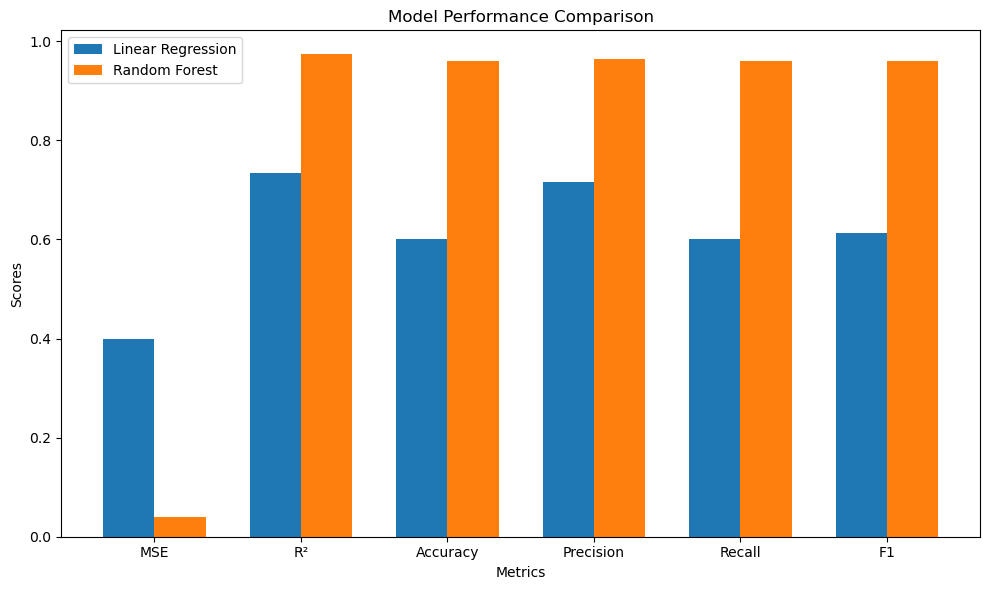

In [54]:
plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, lr_scores, width, label='Linear Regression')
plt.bar(x + width/2, rf_scores, width, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
data_feature_importances = pd.DataFrame({'feature':X.columns, 'importance':rf_model.feature_importances_})
data_feature_importances.sort_values(by='importance', ascending=False)

,feature,importance
3,Sleep Duration,0.666232
11,sleep_efficiency,0.289771
5,Stress Level,0.035035
12,stress_activity_ratio,0.002217
6,BMI Category,0.002172
1,Age,0.001956
4,Physical Activity Level,0.000960
9,Daily Steps,0.000645
8,Heart Rate,0.000397
7,Blood Pressure,0.000300


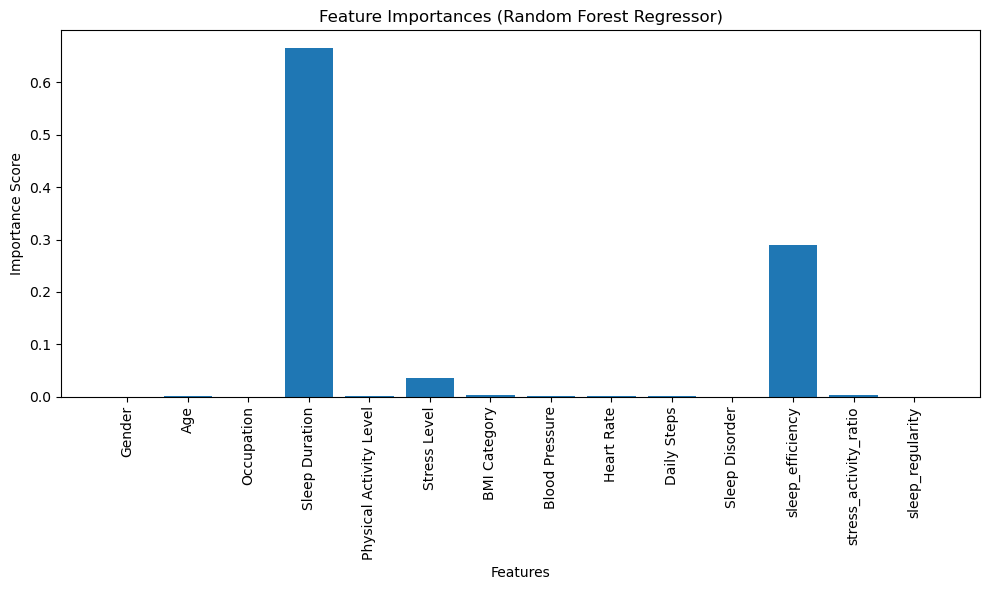

In [60]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Forest Regressor)')
plt.bar(range(X.shape[1]), data_feature_importances['importance'].values)
plt.xticks(range(X.shape[1]), data_feature_importances['feature'].values, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

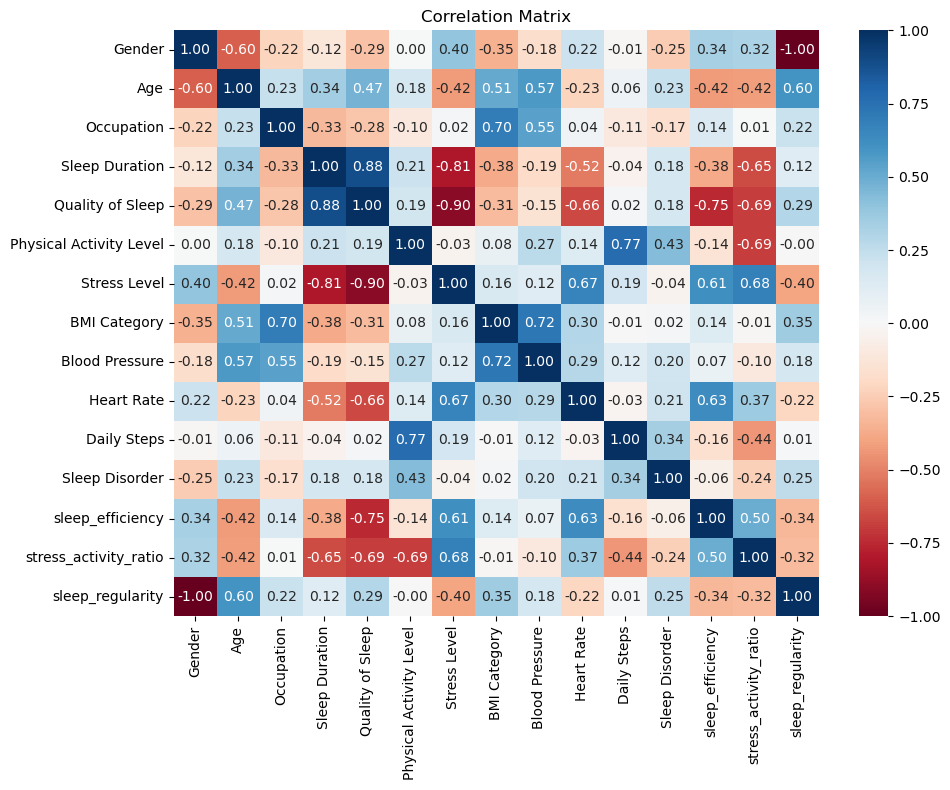

In [64]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  
            cmap='RdBu',  
            vmin=-1,      
            vmax=1,       
            center=0,    
            fmt='.2f')    

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [66]:
predictions_rf = rf_model.predict(X_test)
predictions_lr = lr_model.predict(X_test)

In [68]:
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)
print("Random Forest Performance:")
print("Mean Squared Error:", mse_rf)
print("R² Score:", r2_rf)

Random Forest Performance:
Mean Squared Error: 0.0003066666666666662
R² Score: 0.9997967240160264


In [70]:
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)
print("\nLinear Regression Performance:")
print("Mean Squared Error:", mse_lr)
print("R² Score:", r2_lr)


Linear Regression Performance:
Mean Squared Error: 0.013450961667655264
R² Score: 0.9910839430378787


In [72]:
string_col = data.select_dtypes("object").columns
data[string_col] = data[string_col].astype('string')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int64  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int64  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Blood Pressure           374 non-null    int64  
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int64  
 12  sleep_efficiency         374 non-null    float64
 13  stress_activity_ratio    374 non-null    float64
 14  sleep_regularity         3

In [74]:
columns_of_interest = ['Sleep Duration', 'Physical Activity Level', 'Stress Level']
for column in columns_of_interest:
    if column in data.columns:
        print(f"Statistic for {column}:")
        print(f"Average: {data[column].mean():.2f}")
        print(f"The Median: {data[column].median():.2f}")
        print(f"Minimum: {data[column].min():.2f}")
        print(f"Maximum: {data[column].max():.2f}")
        print()
    else:
        print(f"Column '{column}' is not in dataset.")

Statistic for Sleep Duration:
Average: 7.13
The Median: 7.20
Minimum: 5.80
Maximum: 8.50

Statistic for Physical Activity Level:
Average: 59.17
The Median: 60.00
Minimum: 30.00
Maximum: 90.00

Statistic for Stress Level:
Average: 5.39
The Median: 5.00
Minimum: 3.00
Maximum: 8.00



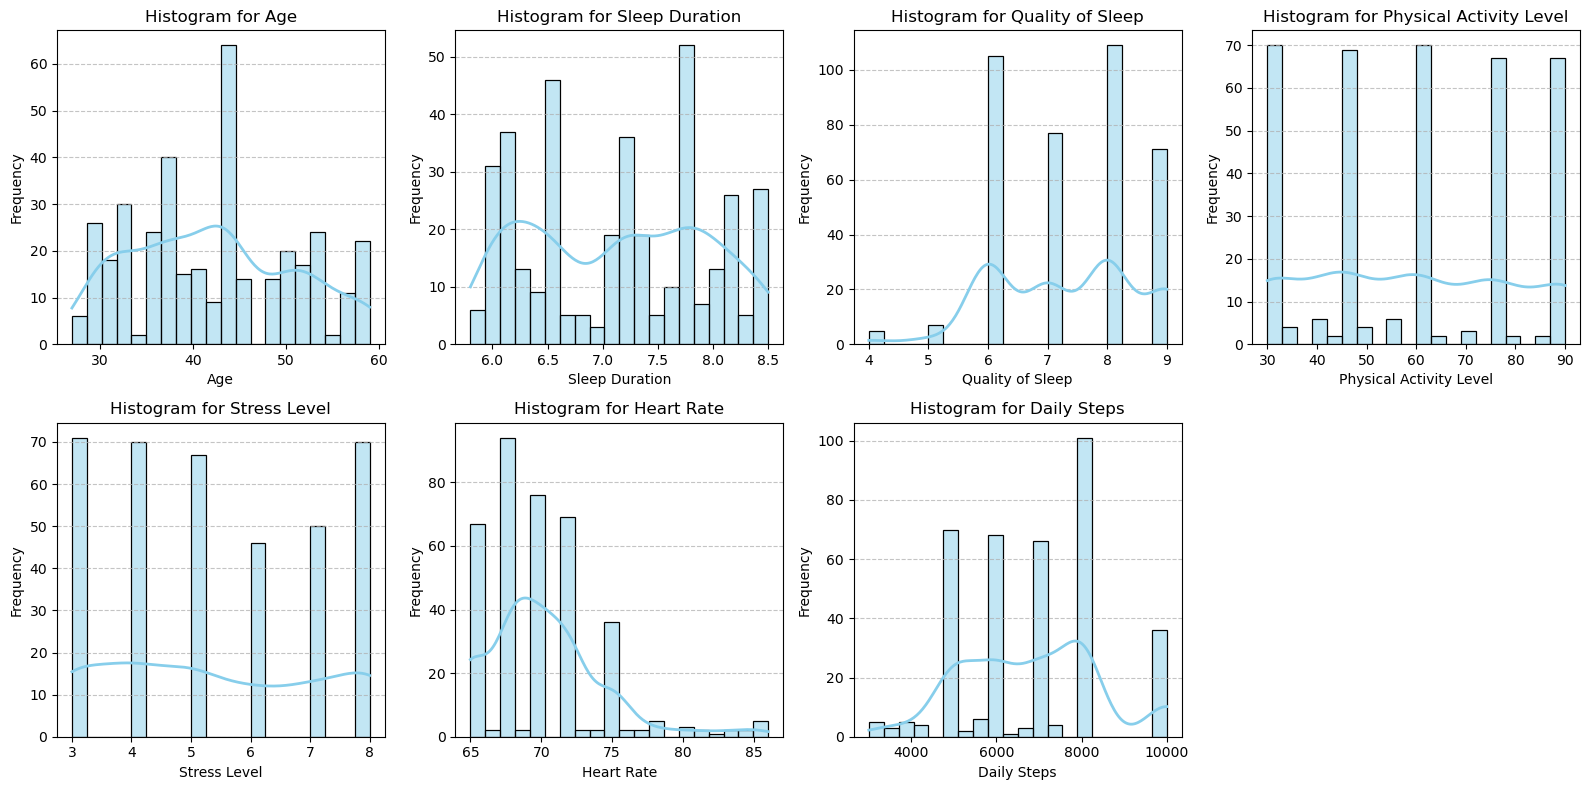

In [82]:
quantitative_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
axes = axes.flatten()  

for i, column in enumerate(quantitative_columns):
    if column in data.columns:
        sns.histplot(data[column].dropna(), kde=True, bins=20, color='skyblue', line_kws={"linewidth": 2}, ax=axes[i])
        axes[i].set_title(f'Histogram for {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', linestyle="--", alpha=0.75)

for j in range(len(quantitative_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()

In [90]:
numerical_col = data.select_dtypes(include=["int64", "float64"])

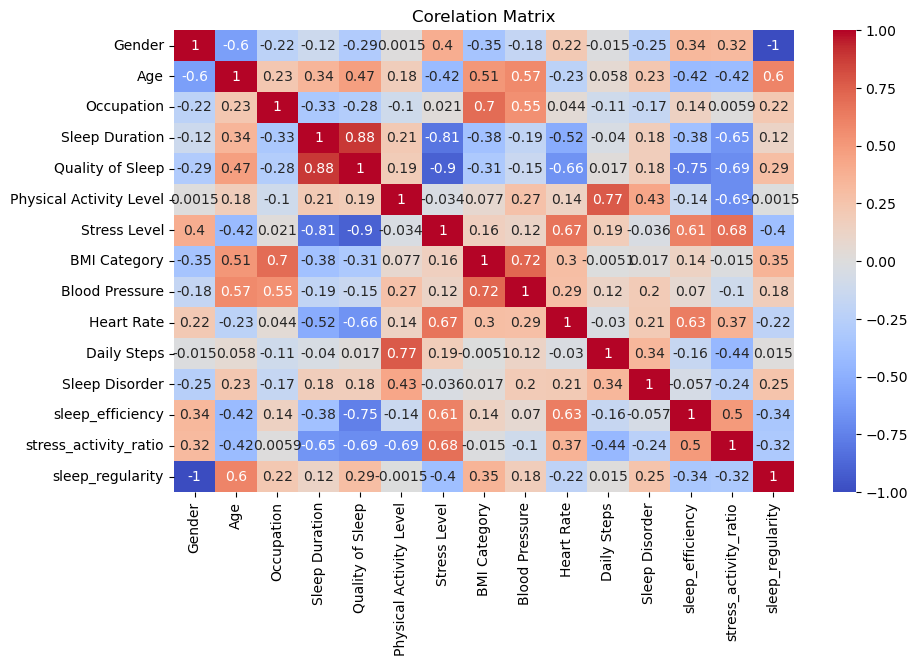

In [94]:
correlation_matrix = numerical_col.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin = -1, vmax=1)
plt.title("Corelation Matrix")
plt.show()

In [98]:
sleep_duration_work = data.groupby('Occupation')['Sleep Duration'].median()
sleep_duration_work = sleep_duration_work.sort_values(ascending=False)
sleep_quality_work = data.groupby('Occupation')['Quality of Sleep'].median()
sleep_quality_work = sleep_quality_work.sort_values(ascending=False)

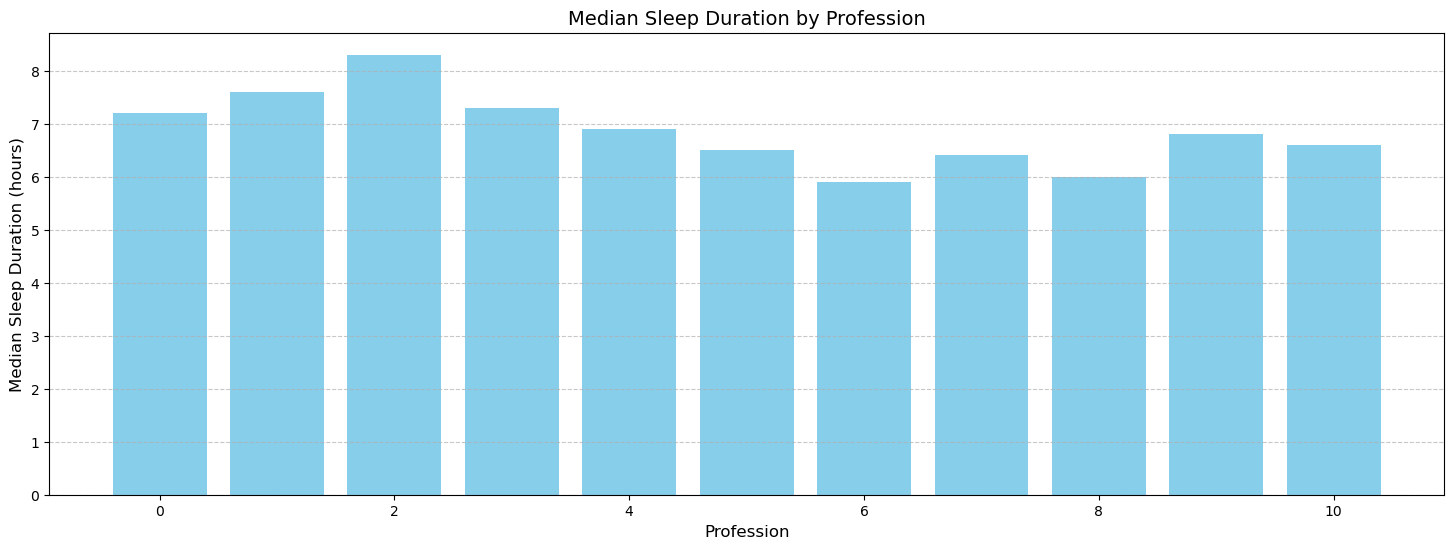

In [100]:
plt.figure(figsize=(18,6))
plt.bar(sleep_duration_work.index, sleep_duration_work.values, color='skyblue')
plt.title('Median Sleep Duration by Profession', fontsize=14)
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Median Sleep Duration (hours)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

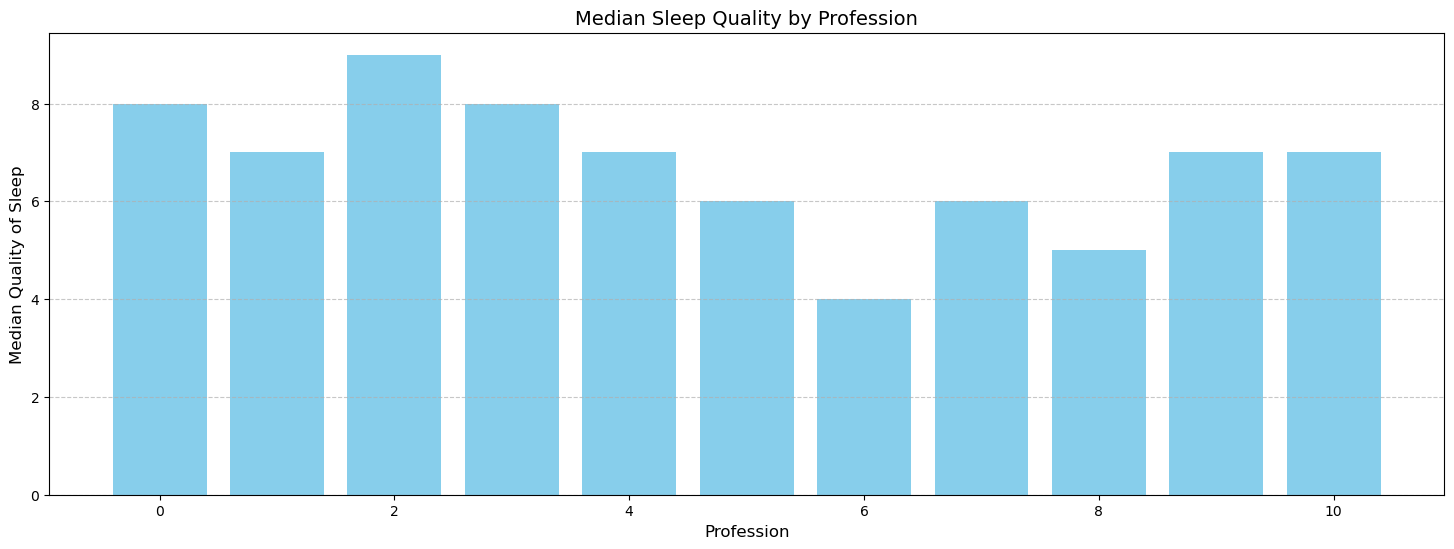

In [102]:
plt.figure(figsize=(18,6))
plt.bar(sleep_quality_work.index, sleep_quality_work.values, color='skyblue')
plt.title('Median Sleep Quality by Profession', fontsize=14)
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Median Quality of Sleep', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

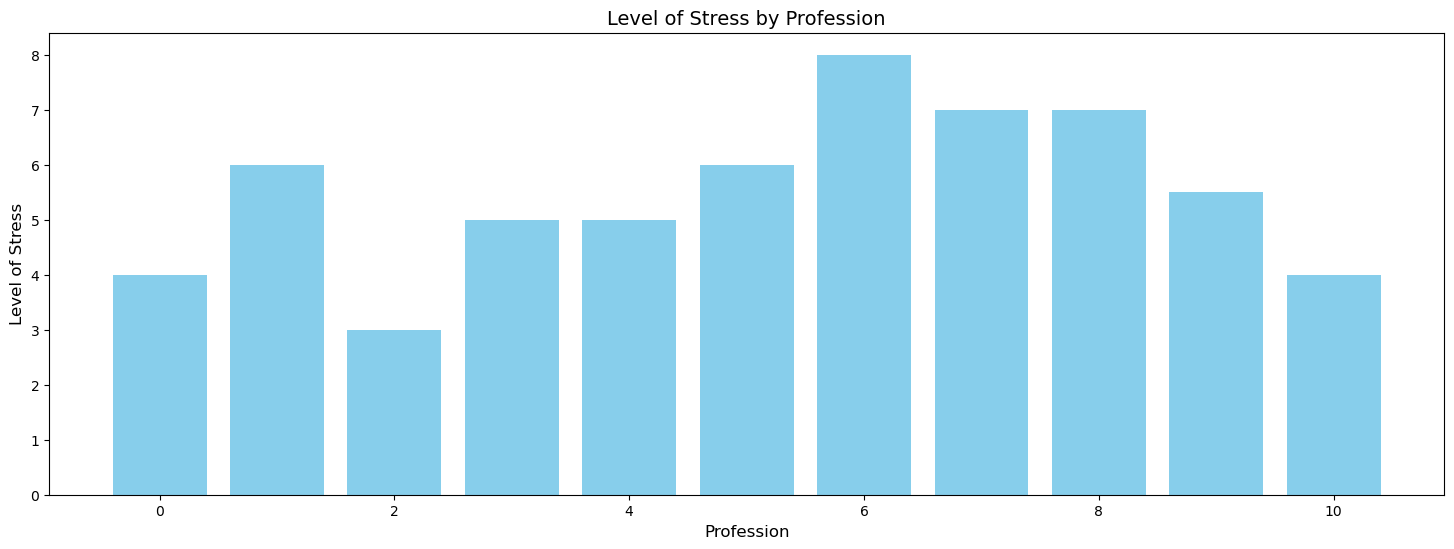

In [104]:
stress_level_work = data.groupby('Occupation')['Stress Level'].median()
stress_level_work = stress_level_work.sort_values(ascending=True)


plt.figure(figsize=(18,6))
plt.bar(stress_level_work.index, stress_level_work.values, color="skyblue")
plt.title("Level of Stress by Profession",fontsize=14)
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Level of Stress", fontsize=12)
plt.show()


In [118]:
string_col = data.select_dtypes("object").columns
data[string_col] = data[string_col].astype('string')

In [120]:
unique_disorders = data['Sleep Disorder'].unique()
print(unique_disorders)

[1 2 0]


In [122]:
unique_occupations = data['Occupation'].unique()
print(unique_occupations)

[ 9  1  6 10  5  2  0  8  3  7  4]


In [124]:
def sum_of_disorders_per_job(data, unique_occupations):
    summ=[]
    for i in unique_occupations:
        filtered_df = data[data['Occupation'] == i]
        filtered_df_sleep_apnea = filtered_df[filtered_df['Sleep Disorder'] == 'Sleep Apnea']
        filtered_df_insomnia = filtered_df[filtered_df['Sleep Disorder'] == 'Insomnia']
        summ.append(len(filtered_df_insomnia)+len(filtered_df_sleep_apnea))
    return summ
    
summ = sum_of_disorders_per_job(data, unique_occupations)
disorders_per_job = pd.Series(summ, index=unique_occupations)
print(disorders_per_job)    

9     0
1     0
6     0
10    0
5     0
2     0
0     0
8     0
3     0
7     0
4     0
dtype: int64


In [132]:
from sklearn.preprocessing import PolynomialFeatures

In [134]:
X = data[['Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Age']]
y = data['Quality of Sleep']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE = {rmse}')

quality_of_sleep_mean = data ['Quality of Sleep'].mean()

print(f'Relative error = {rmse/quality_of_sleep_mean*100} %')


RMSE = 0.31793569735473504
Relative error = 4.347639883388333 %


In [136]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

features = ['Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 
            'Age', 'Gender', 'Occupation', 'Sleep Duration']
target = 'Sleep Disorder'

label_encoders = {}
for col in ['Gender', 'Occupation']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data[target] = data[target].fillna('None')
data[target] = LabelEncoder().fit_transform(data[target])

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.93      0.93      0.93        43
           2       0.92      0.75      0.83        16

    accuracy                           0.88        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.88      0.88        75



In [138]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

features = ['Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 
            'Age', 'Gender', 'Occupation', 'Sleep Duration']
target = 'Sleep Disorder'

data[target] = data[target].fillna('None')

X = data[features]
y = data[target]

categorical_features = ['Gender', 'Occupation']
numerical_features = ['Physical Activity Level', 'Stress Level', 'Heart Rate', 
                      'Daily Steps', 'Age', 'Sleep Duration']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  
        ('cat', OneHotEncoder(drop='first'), categorical_features)  
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.93      0.95      0.94        43
           2       0.92      0.69      0.79        16

    accuracy                           0.88        75
   macro avg       0.86      0.84      0.84        75
weighted avg       0.89      0.88      0.88        75

